In [1]:
# Import useful libraries
import numpy as np
import matplotlib.pyplot as plt

### Diffusion equation
\begin{eqnarray}
\frac{\partial f(x,t)}{\partial t}
&=&
D
\frac{\partial^2 f(x,t)}{\partial x^2} \, ,
\label{eq:DiffEq}
\end{eqnarray}

#### Solution 
\begin{eqnarray}
f(x,t) = \frac{1}{\sqrt{4\pi D t}} \exp\left( - \frac{x^2}{4Dt} \right) \, 
\label{eq:Gfunc}
\end{eqnarray}

#### Initial condition:
$$
f(x,0) = \delta(x - x_0)
$$

#### Boundary condition:
$$
\lim_{x \rightarrow \pm \infty} f(x,t) = 0
$$

In [2]:
# Diffusion constant
D  = 1 # nm2 ps-1

# Initial position
x0 = 0 # nm

def f(x,t):
    return ( 4 * np.pi * D * t)**-0.5 * np.exp( - (x - x0)**2 * ( 4 * D * t)**-1 )

def sigma2(t):
    return 2 * D * t

Integral over R:  1.0
Integral over R:  0.9999999999984612
Integral over R:  0.9746524367507532


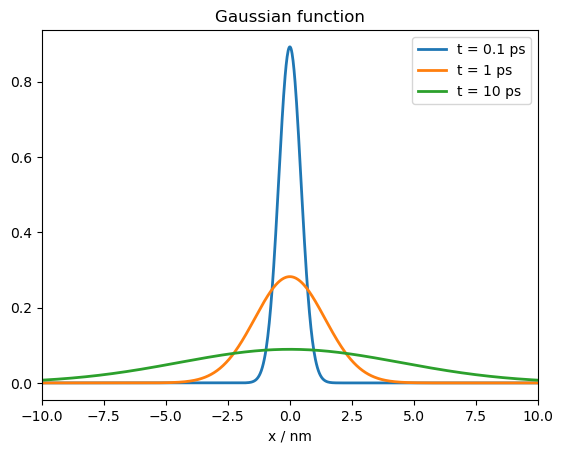

In [3]:
# Array of x values
xvalues = 1000
xmin  = -10
xmax  = - xmin
x     = np.linspace(xmin, xmax, xvalues)
dx    = x[1] - x[0]

# Time
t1     = 0.1 # ps
t2     = 1 # ps
t3     = 10 # ps

# Check normalization
N1     = np.trapz(f(x,t1), x)
N2     = np.trapz(f(x,t2), x)
N3     = np.trapz(f(x,t3), x)

print('Integral over R: ', str(N1))
print('Integral over R: ', str(N2))
print('Integral over R: ', str(N3))

# Figure
plt.plot(x, f(x,t1), linewidth = 2, label = 't = 0.1 ps')
plt.plot(x, f(x,t2), linewidth = 2, label = 't = 1 ps')
plt.plot(x, f(x,t3), linewidth = 2, label = 't = 10 ps')
plt.xlabel('x / nm')
plt.xlim((xmin, xmax))
plt.title('Gaussian function')
plt.legend();

In [4]:
# Number of simulations (replicas)
Nreps  = 1000

# Number of timesteps per each trajectory
Nsteps = 10000

# Timestep
dt = 0.001 # ps

X = np.zeros((Nsteps, Nreps))

# Assign initial condition
X[0,:] = x0

# sigma
sigma = np.sqrt(2 * D * dt)

# Array for variance
v = np.zeros(Nsteps)

for n in range(Nsteps-1):
    X[n+1,:] = X[n,:] + sigma * np.random.normal(size=(1,Nreps))
    v[n+1]   = np.var(X[n+1,:])

Text(0.5, 1.0, 'Trajectories')

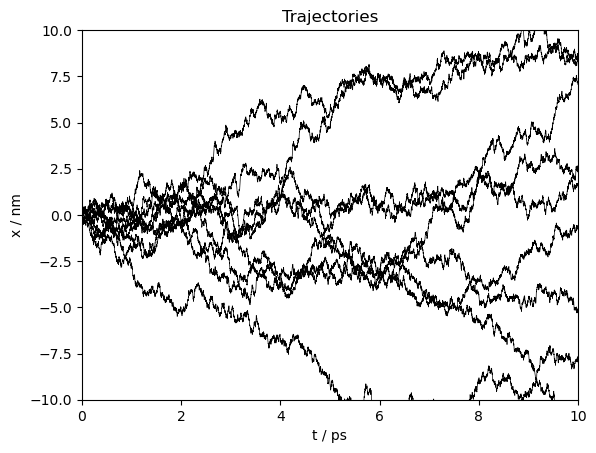

In [5]:
# Array of t values
tvalues = np.linspace(0, Nsteps, Nsteps)
tvalues = tvalues * dt

# Figure
plt.plot(tvalues, X[:,1:10], 'k', linewidth=0.5);
plt.xlabel('t / ps')
plt.ylabel('x / nm')
plt.xlim((0,Nsteps*dt))
plt.ylim((xmin, xmax))
plt.title('Trajectories')

In [6]:
# Build a histogram every 20 timesteps
xbins = 101
xmin = -5
xmax = 5
xaxis = np.linspace(xmin, xmax, xbins)


n0 = 1
t0 = n0 * dt
f0 = f(x,t0)
h  = np.histogram(X[n0,:], bins=xbins, range=(xmin, xmax), density=True)
h0 = h[0]

n1 = 100
t1 = n1 * dt
f1 = f(x,t1)
h  = np.histogram(X[n1,:], bins=xbins, range=(xmin, xmax), density=True)
h1 = h[0]

n2 = 200
t2 = n2 * dt
f2 = f(x,t2)
h  = np.histogram(X[n2,:], bins=xbins, range=(xmin, xmax), density=True)
h2 = h[0]

n3 = 300
t3 = n3 * dt
f3 = f(x,t3)
h  = np.histogram(X[n3,:], bins=xbins, range=(xmin, xmax), density=True)
h3 = h[0]

n4 = 400
t4 = n4 * dt
f4 = f(x,t4)
h  = np.histogram(X[n4,:], bins=xbins, range=(xmin, xmax), density=True)
h4 = h[0]



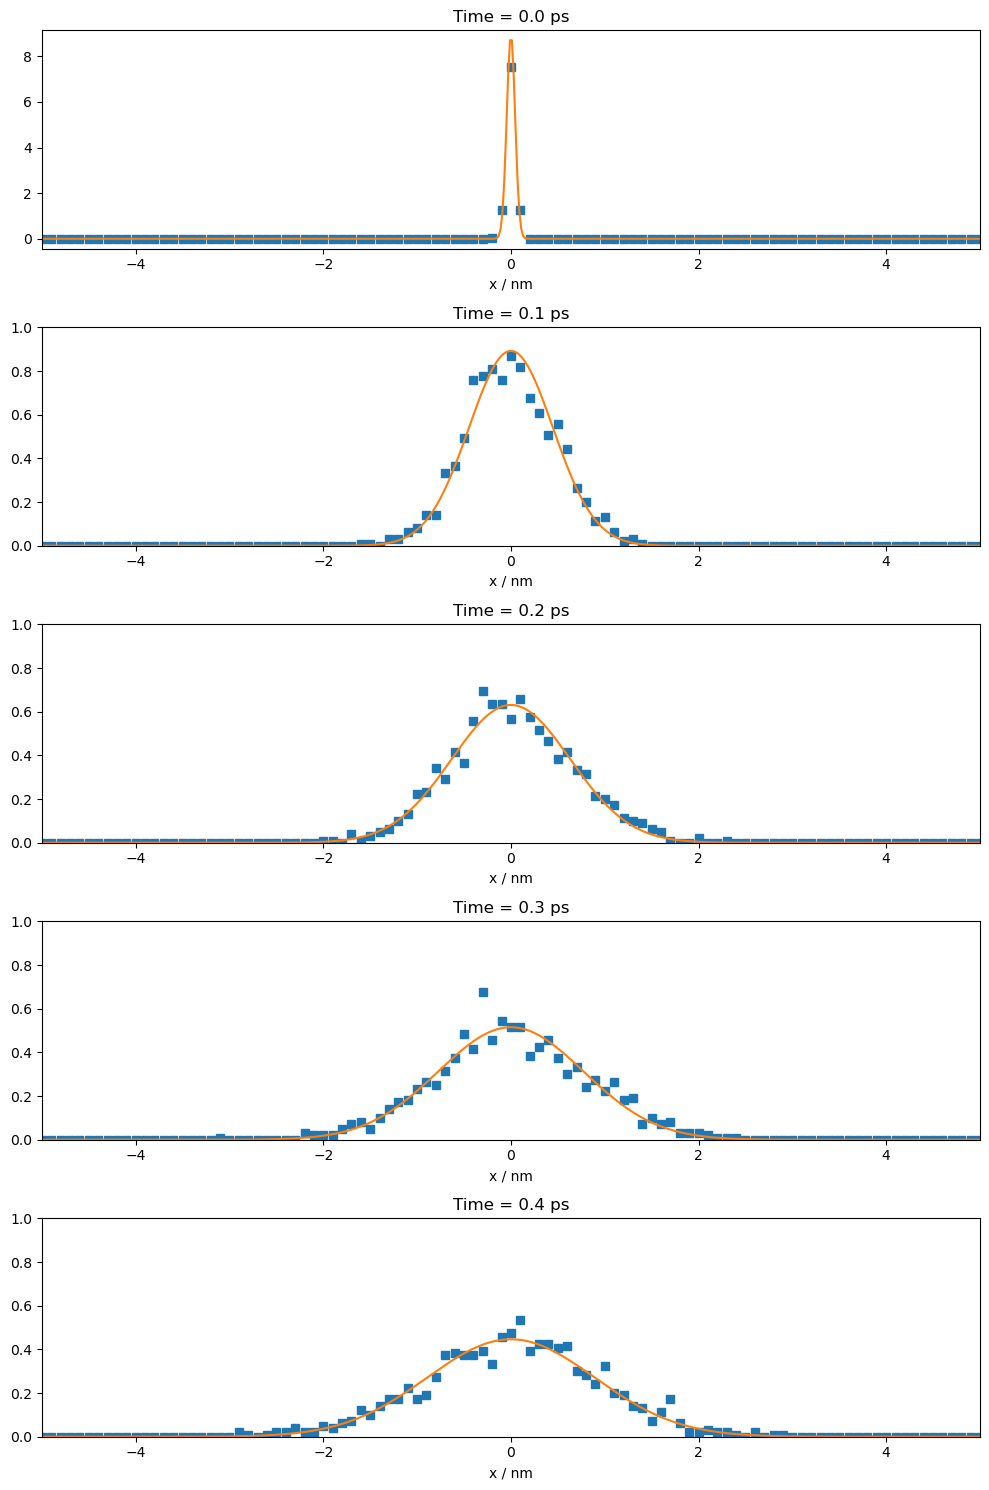

In [7]:
fig, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(5, figsize=(10, 15))
ax0.plot(xaxis, h0,'s')
ax0.plot(x, f0)
ax0.set_xlabel('x / nm')
ax0.set_title('Time = %1.1f ps' %t0)
ax0.set_xlim((xmin, xmax))

ax1.plot(xaxis, h1,'s')
ax1.plot(x, f1)
ax1.set_xlabel('x / nm')
ax1.set_title('Time = %1.1f ps' %t1)
ax1.set_xlim((xmin, xmax))
ax1.set_ylim((0, 1))

ax2.plot(xaxis, h2,'s')
ax2.plot(x, f2)
ax2.set_xlabel('x / nm')
ax2.set_title('Time = %1.1f ps' %t2)
ax2.set_xlim((xmin, xmax))
ax2.set_ylim((0, 1))

ax3.plot(xaxis, h3,'s')
ax3.plot(x, f3)
ax3.set_xlabel('x / nm')
ax3.set_title('Time = %1.1f ps' %t3)
ax3.set_xlim((xmin, xmax))
ax3.set_ylim((0, 1))

ax4.plot(xaxis, h4,'s')
ax4.plot(x, f4)
ax4.set_xlabel('x / nm')
ax4.set_title('Time = %1.1f ps' %t4)
ax4.set_xlim((xmin, xmax))
ax4.set_ylim((0, 1))

fig.tight_layout()

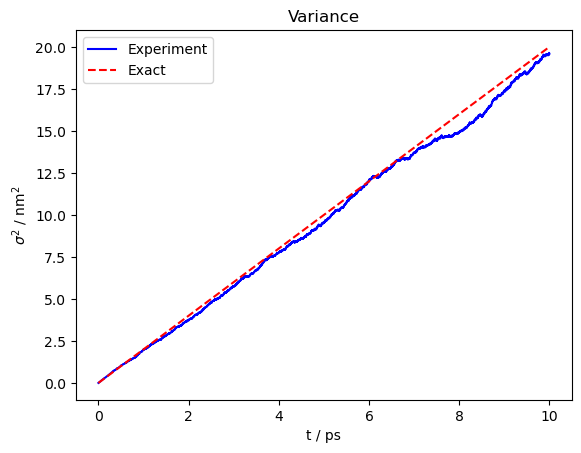

In [9]:
plt.plot(tvalues, v,                'b', label= 'Experiment')
plt.plot(tvalues, sigma2(tvalues), 'r--', label= 'Exact')
plt.xlabel('t / ps')
plt.ylabel(r'$\sigma^2$ / nm$^2$')
plt.title('Variance')
plt.legend();